# Multiple Linear Regresion on Student Performance

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [72]:
df=pd.read_csv(r"C:\Users\Akhil\Desktop\data analytics\dataset for linear regression\Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [73]:
ohe= OneHotEncoder()

In [75]:
encoded= ohe.fit_transform(df[["Extracurricular Activities"]])
encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10000 stored elements and shape (10000, 2)>

In [76]:
encoded.toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [77]:
ohe.get_feature_names_out()

array(['Extracurricular Activities_No', 'Extracurricular Activities_Yes'],
      dtype=object)

In [78]:
df[ohe.get_feature_names_out()]=encoded.toarray()

In [79]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,Yes,9,1,91.0,0.0,1.0
1,4,82,No,4,2,65.0,1.0,0.0
2,8,51,Yes,7,2,45.0,0.0,1.0
3,5,52,Yes,5,2,36.0,0.0,1.0
4,7,75,No,8,5,66.0,1.0,0.0


In [80]:
df.drop("Extracurricular Activities",axis=1,inplace=True)

In [81]:
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91.0,0.0,1.0
1,4,82,4,2,65.0,1.0,0.0
2,8,51,7,2,45.0,0.0,1.0
3,5,52,5,2,36.0,0.0,1.0
4,7,75,8,5,66.0,1.0,0.0


In [82]:
std_scalar= StandardScaler()

In [96]:
df["Performance Index"]=std_scalar.fit_transform(df[["Performance Index"]])

In [97]:
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,1.862167,0.0,1.0
1,4,82,4,2,0.508818,1.0,0.0
2,8,51,7,2,-0.532220,0.0,1.0
3,5,52,5,2,-1.000687,0.0,1.0
4,7,75,8,5,0.560870,1.0,0.0


In [99]:
minmax_scalar= MinMaxScaler()

In [104]:
df[["Hours Studied","Previous Scores","Sleep Hours","Sample Question Papers Practiced"]]=minmax_scalar.fit_transform(df[["Hours Studied","Previous Scores","Sleep Hours","Sample Question Papers Practiced"]])

In [105]:
df.sample(5)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
9187,0.125,0.152542,0.8,0.333333,-1.677362,0.0,1.0
2271,0.500,0.677966,0.0,0.666667,0.508818,0.0,1.0
1617,0.750,0.881356,1.0,0.111111,1.653959,1.0,0.0
8066,0.500,0.542373,0.2,0.777778,0.092403,1.0,0.0
6539,0.250,0.305085,0.8,0.666667,-0.792480,1.0,0.0


In [106]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index',
       'Extracurricular Activities_No', 'Extracurricular Activities_Yes'],
      dtype='object')

In [107]:
df=df[["Hours Studied","Sleep Hours","Sample Question Papers Practiced","Previous Scores","Extracurricular Activities_Yes",
      "Extracurricular Activities_No","Performance Index"]]
df.head(5)

,Hours Studied,Sleep Hours,Sample Question Papers Practiced,Previous Scores,Extracurricular Activities_Yes,Extracurricular Activities_No,Performance Index
0,0.750,1.0,0.111111,1.000000,1.0,0.0,1.862167
1,0.375,0.0,0.222222,0.711864,0.0,1.0,0.508818
2,0.875,0.6,0.222222,0.186441,1.0,0.0,-0.532220
3,0.500,0.2,0.222222,0.203390,1.0,0.0,-1.000687
4,0.750,0.8,0.555556,0.593220,0.0,1.0,0.560870


In [108]:
df.corr()

,Hours Studied,Sleep Hours,Sample Question Papers Practiced,Previous Scores,Extracurricular Activities_Yes,Extracurricular Activities_No,Performance Index
Hours Studied,1.000000,0.001245,0.017463,-0.012390,0.003873,-0.003873,0.373730
Sleep Hours,0.001245,1.000000,0.003990,0.005944,-0.023284,0.023284,0.048106
Sample Question Papers Practiced,0.017463,0.003990,1.000000,0.007888,0.013103,-0.013103,0.043268
Previous Scores,-0.012390,0.005944,0.007888,1.000000,0.008369,-0.008369,0.915189
Extracurricular Activities_Yes,0.003873,-0.023284,0.013103,0.008369,1.000000,-1.000000,0.024525
Extracurricular Activities_No,-0.003873,0.023284,-0.013103,-0.008369,-1.000000,1.000000,-0.024525
Performance Index,0.373730,0.048106,0.043268,0.915189,0.024525,-0.024525,1.000000


<Axes: >

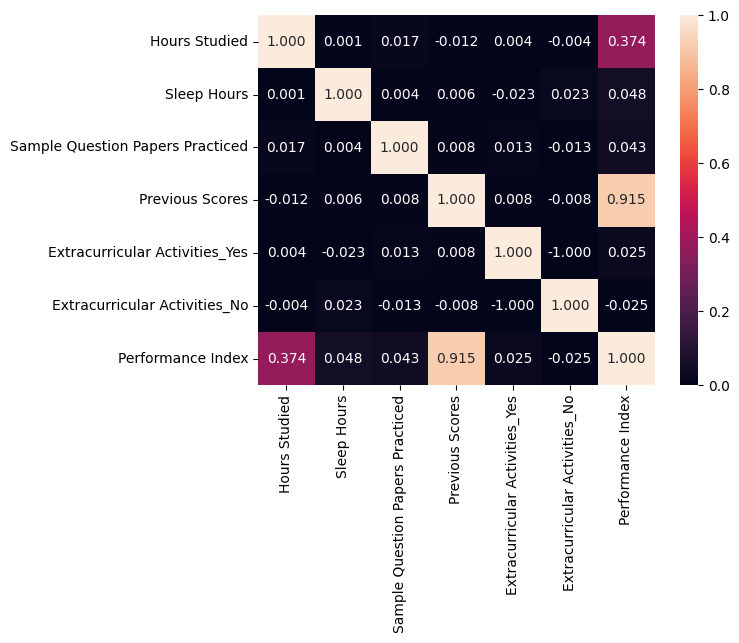

In [109]:
sns.heatmap(df.corr(),annot=True,fmt=".3f",vmin=0,vmax=1)

In [110]:
x= df.drop("Performance Index",axis=1)
y= df["Performance Index"]

In [116]:
x_tr, x_te, y_tr, y_te= train_test_split(x,y,train_size=0.75,random_state=45)

In [117]:
x_tr.shape

(7500, 6)

In [118]:
x_te.shape

(2500, 6)

In [119]:
model = LinearRegression()

In [120]:
model.fit(x_tr,y_tr)

LinearRegression()

In [121]:
training_accuracy=model.score(x_tr,y_tr)
training_accuracy

0.988813268378523

In [122]:
y_pred= model.predict(x_te)
y_pred

array([-0.59396278,  1.51185754,  0.79404049, ..., -0.4560636 ,
       -1.12030822,  0.24782613])

In [123]:
r2= r2_score(y_te,y_pred)
r2

0.9885698491181311

In [124]:
n,k=x_tr.shape[0],x_te.shape[1]
n,k

(7500, 6)

In [125]:
adj_r2= 1-((1-r2)*(n-1))/(n-k-1)
adj_r2

0.9885606964549399